In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptops-price-dataset/laptops.csv


# Laptop Price Analysis

To perform this analysis, I am using a dataset called [Laptop Price dataset](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset)


Before starting the analysis, The following libraries are installed and imported.
* Pandas
* Numpy
* Matplotlib
* Seaborn

## Importing the Modules

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Uploading the dataset

In [5]:
Data = pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")

## Data Exploration

In [6]:
Data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
Data.shape

(2160, 12)

In [8]:
Data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [10]:
Data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


### Handling Missing and Nan Values

In [11]:
Data.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [12]:
Data.isnull().sum().sum()

1417

In [13]:
Data['GPU'].value_counts()

RTX 3050              129
RTX 3060              122
RTX 3070               97
RTX 4060               62
RTX 3080               51
GTX 1650               50
RTX 4070               40
RTX 4050               33
RTX 2070               25
RTX 2060               20
RTX 4080               18
RTX 4090               17
GTX 1660               14
RTX 2050               11
Radeon Pro 5500M        9
RTX A2000               8
RTX 2080                7
MX 450                  7
RTX A3000               7
RTX A1000               6
T 1200                  6
MX 550                  5
MX 330                  5
T 500                   5
T 550                   4
GTX 1050                3
Radeon Pro RX 560X      3
RTX A5500               3
RX 6500M                3
RX 7600S                2
T 600                   2
Radeon Pro 5300M        2
610 M                   2
RX 6700M                1
P 500                   1
MX 130                  1
A 370M                  1
RX 6800S                1
T 2000      

In [24]:
Data['GPU'].fillna("Unknown",inplace=True)

In [27]:
print(Data["GPU"].value_counts().sum())
print(Data["GPU"].isnull().sum())

2160
0


In [19]:
Data['Storage type'].value_counts()

SSD     2062
eMMC      56
Name: Storage type, dtype: int64

In [22]:
Data['Storage type'].fillna("SSD",inplace=True)

In [28]:
Data['Storage type'].isnull().sum()

0

In [31]:
Data['Screen'].value_counts()

15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.50      19
13.40      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
12.00       4
18.00       3
14.50       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: Screen, dtype: int64

In [33]:
Data['Screen'].fillna(15.60,inplace=True)

In [35]:
Data['Screen'].isnull().sum()

0

In [36]:
Data.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

In [37]:
Data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,Unknown,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,Unknown,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,Unknown,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,Unknown,15.6,No,669.01


In [38]:
Data['Laptop'].nunique()

2160

In [39]:
Data.nunique()

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               45
Screen            29
Touch              2
Final Price     1440
dtype: int64

There are Total **27** Brands 

In [43]:
Data['Status'].value_counts(normalize=True)*100

New            69.351852
Refurbished    30.648148
Name: Status, dtype: float64

**70** % Laptops are New and others are refurbished

<Axes: >

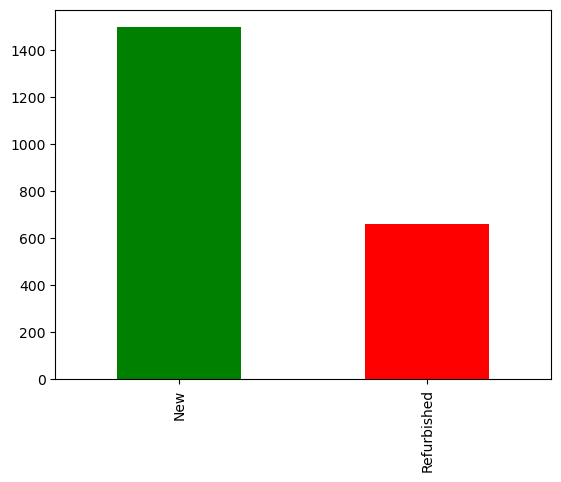

In [74]:
Status_of_laptop = Data['Status'].value_counts()
Status_of_laptop.plot.bar(color=['green','red'])

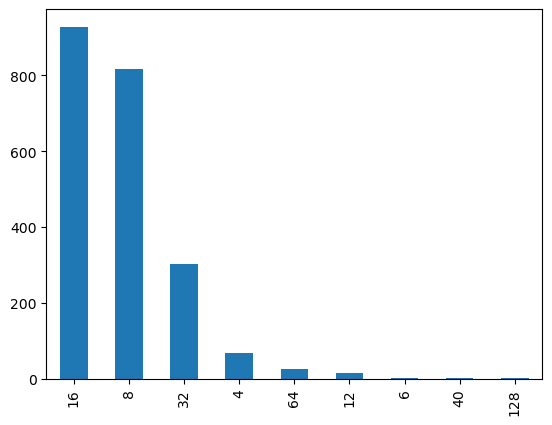

In [72]:
Laptop_by_RAM = Data['RAM'].value_counts()
Laptop_by_RAM.plot.bar()
plt.show()

**16GB and 8GB** RAM Laptops are highly wanted by Customers.

<Axes: >

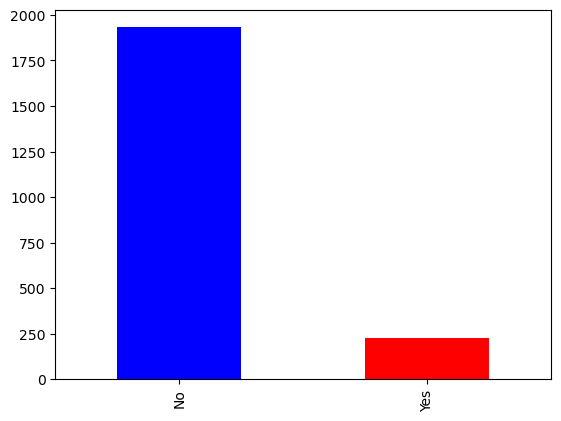

In [75]:
Touch_of_laptop = Data['Touch'].value_counts()
Touch_of_laptop.plot.bar(color=['blue','red'])

Majority of the laptops are not touch capable.

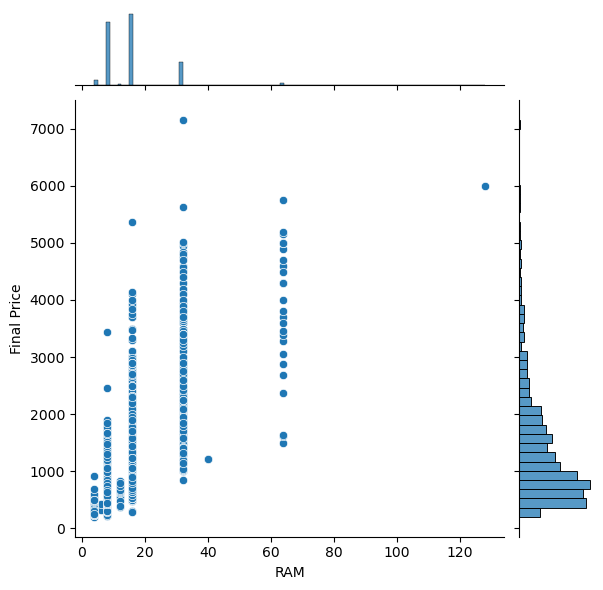

In [88]:
sns.jointplot(x="RAM", y="Final Price", \
              data=Data,kind='scatter');

laptops of Between **0-20GB** Ram has the price between **0-4000**